In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import dataprep
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
%matplotlib inline

import seaborn as sns
plt.rc('figure', figsize=(13, 7))
# plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('fivethirtyeight')


In [4]:
df = pd.read_csv('stores_data.csv')
df

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item           913000 non-null  int64  
 2   quantity       913000 non-null  float64
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_id       913000 non-null  int64  
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  int64  
 10  item_brand     913000 non-null  object 
 11  item_id        913000 non-null  int64  
 12  item_name      913000 non-null  object 
 13  item_price     913000 non-null  float64
 14  item_upc12     913000 non-null  int64  
 15  item_upc14     913000 non-null  int64  
 16  month          913000 non-nu

In [5]:
df = dataprep.prep_store_data(df)

In [6]:
df

,Unnamed: 0,item,quantity,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,2013,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,619013,34,21.0,619014,9,735 SW Military Dr,San Antonio,9,TX,78221,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12,2017,87.57
2017-12-31 00:00:00+00:00,620839,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12,2017,133.44
2017-12-31 00:00:00+00:00,622665,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12,2017,285.45


<AxesSubplot:xlabel='sale_date'>

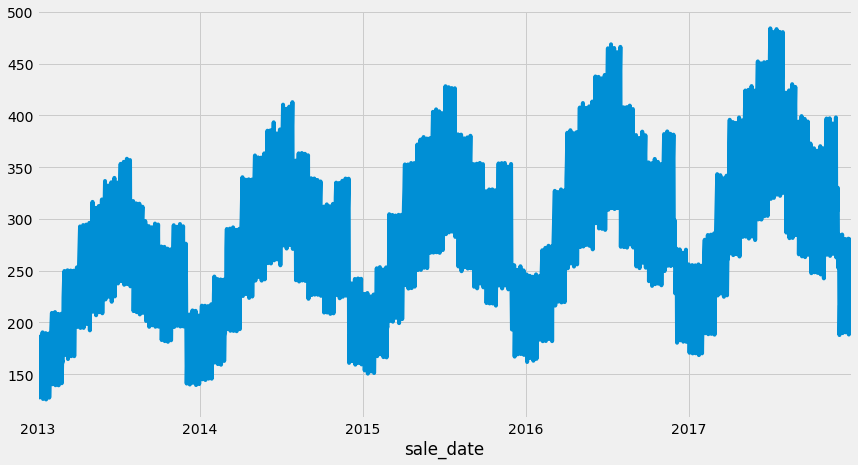

In [7]:
df.resample('D').sales_total.mean().plot()

<AxesSubplot:xlabel='sale_date'>

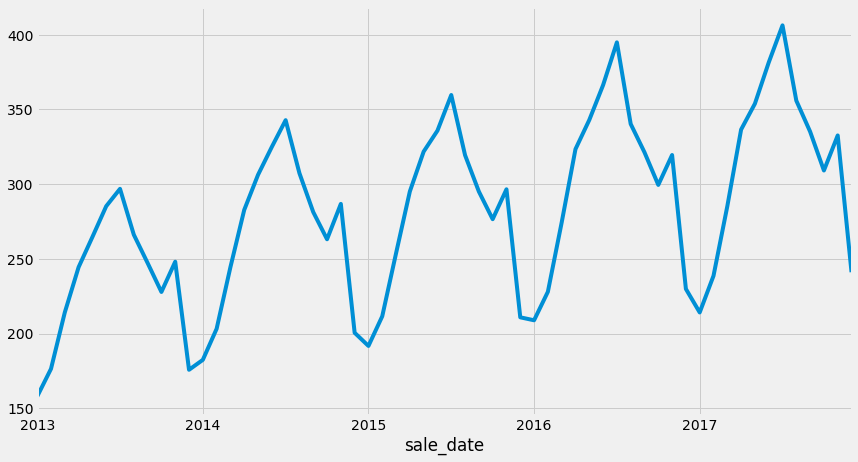

In [9]:
df.resample('M').sales_total.mean().plot()

<AxesSubplot:xlabel='sale_date'>

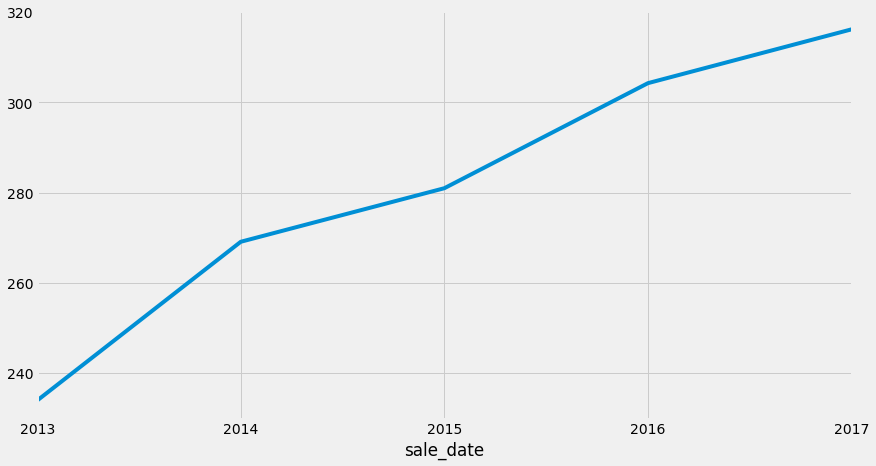

In [10]:
df.resample('Y').sales_total.mean().plot()

In [11]:
# Train test split:

train = df[:'2016']
test = df['2017']


<AxesSubplot:xlabel='sale_date'>

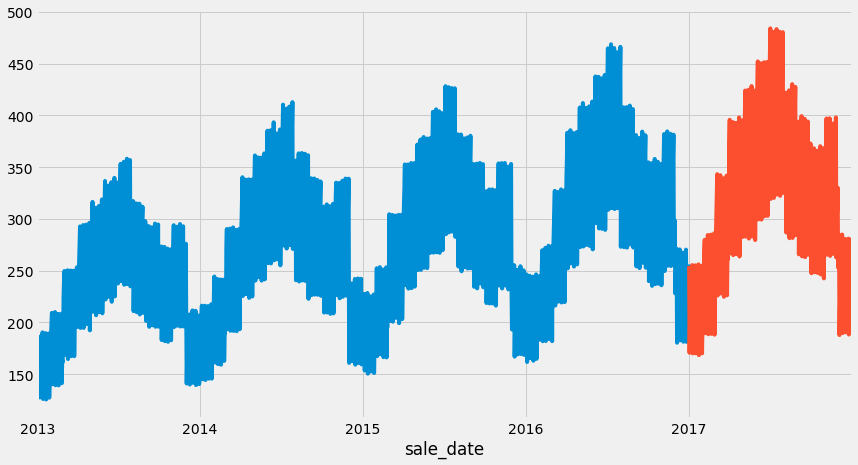

In [12]:
train = df.loc[:'2016'] # includes 2016
test = df.loc['2017']
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

<AxesSubplot:xlabel='weekday'>

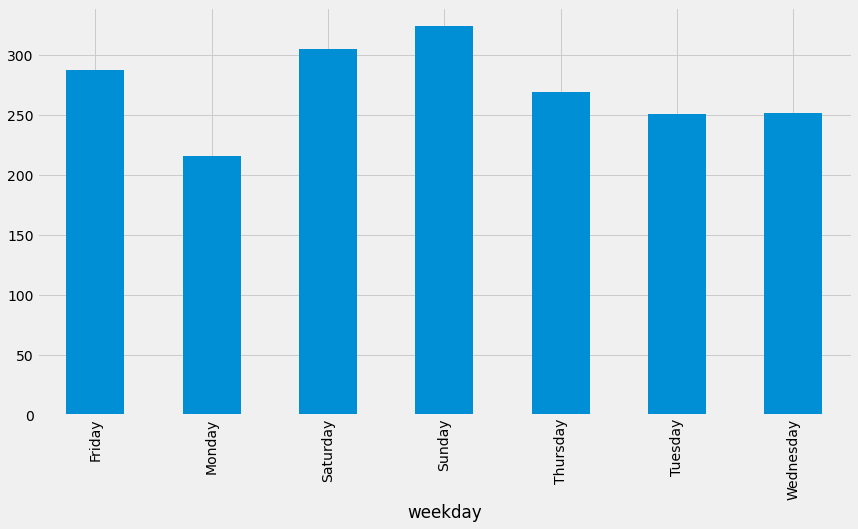

In [13]:
train['weekday'] = train.index.day_name()
train.groupby('weekday').sales_total.mean().plot.bar()


<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

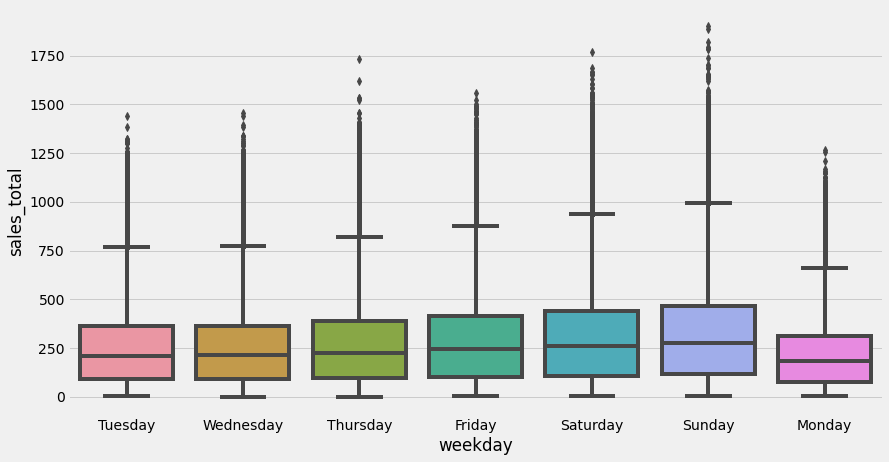

In [14]:
sns.boxplot(data=train, y='sales_total', x='weekday')

In [17]:
# test_by_date = test.groupby(['sale_date']).sales_total.mean().reset_index()
# test_by_date = test_by_date.set_index('sale_date').sort_index()
train_daily = pd.DataFrame(train.resample('D').sales_total.mean())
train_daily.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

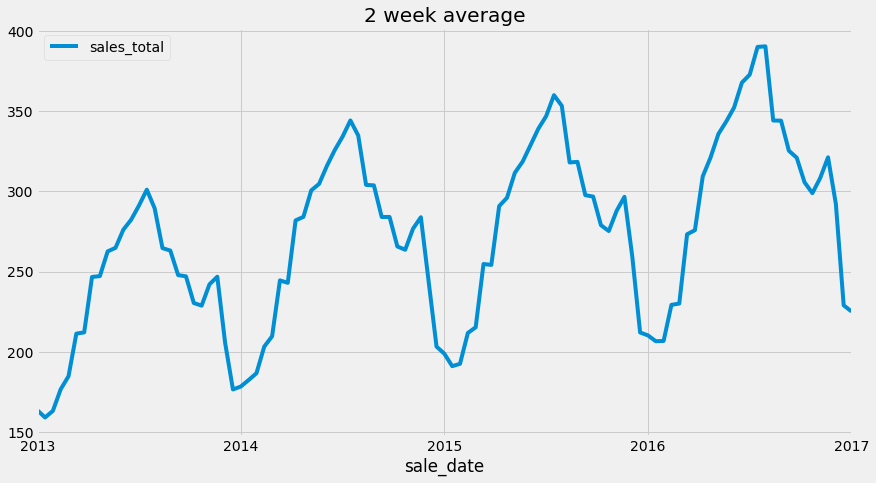

In [18]:
train_daily.resample('2W').mean().plot(title='2 week average')

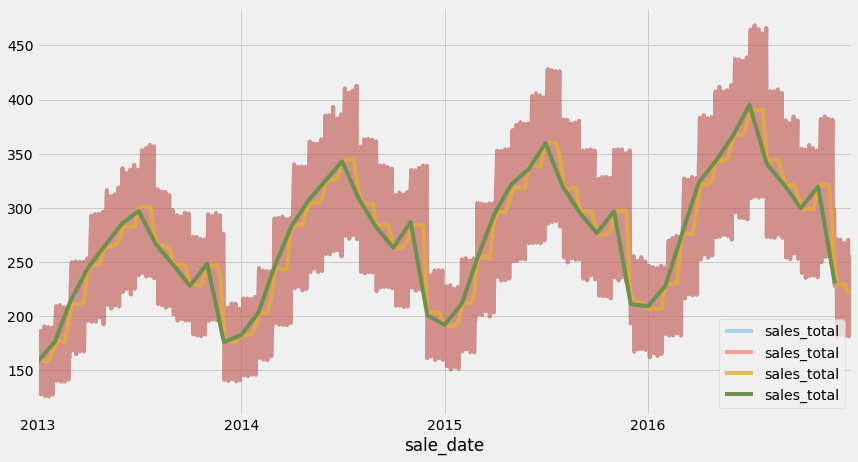

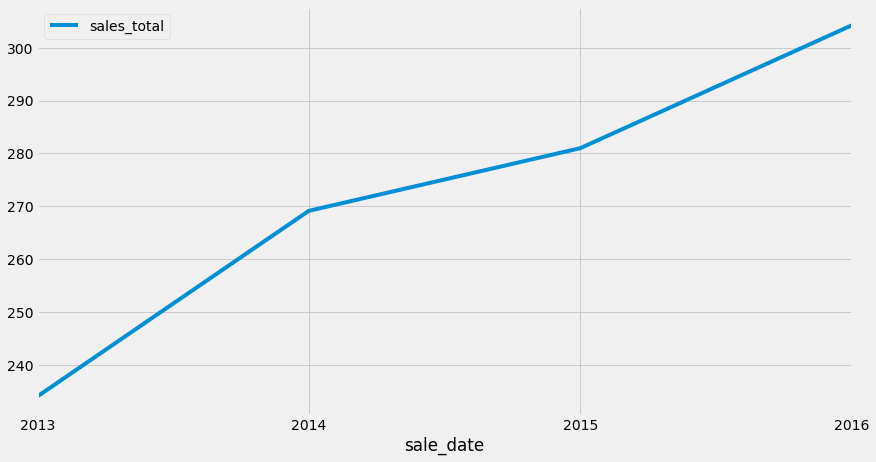

In [19]:
ax = train_daily.plot(alpha=.3, label='Hourly')
train_daily.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
train_daily.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
train_daily.resample('M').mean().plot(ax=ax, label='Monthly')
train_daily.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

Text(0.5, 1.0, 'Mean sales_total by month, boxplot')

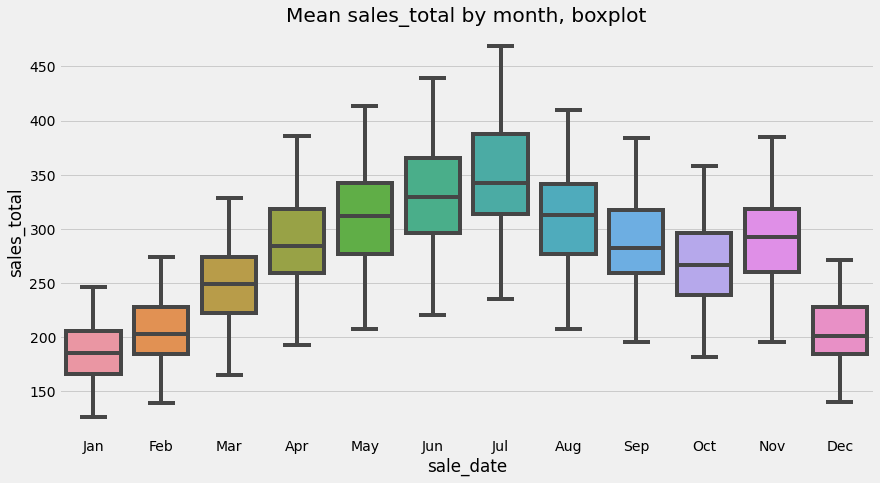

In [20]:
# boxplot for each month
ax = sns.boxplot(data =train_daily, x = train_daily.index.strftime('%m-%b'), y = train_daily['sales_total'])  # (train_by_date.index.strftime('%m-%b')) diff. month format
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);
plt.title('Mean sales_total by month, boxplot')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

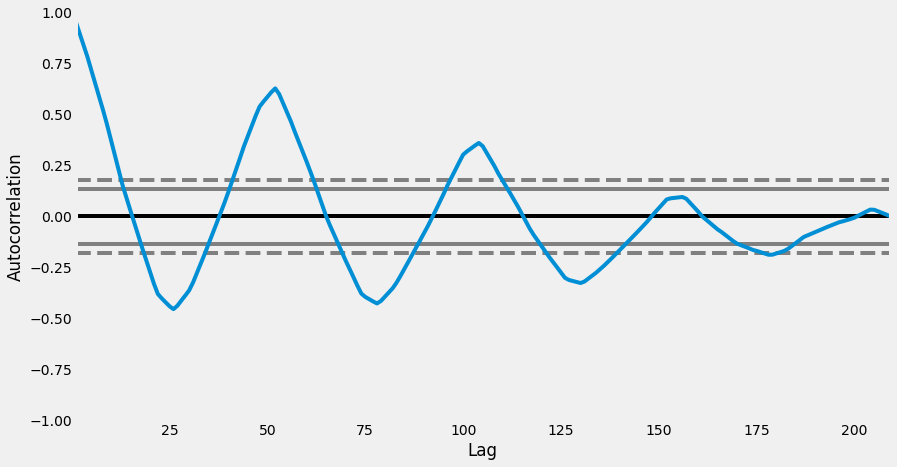

In [21]:
pd.plotting.autocorrelation_plot(train_daily.sales_total.resample('W').mean())

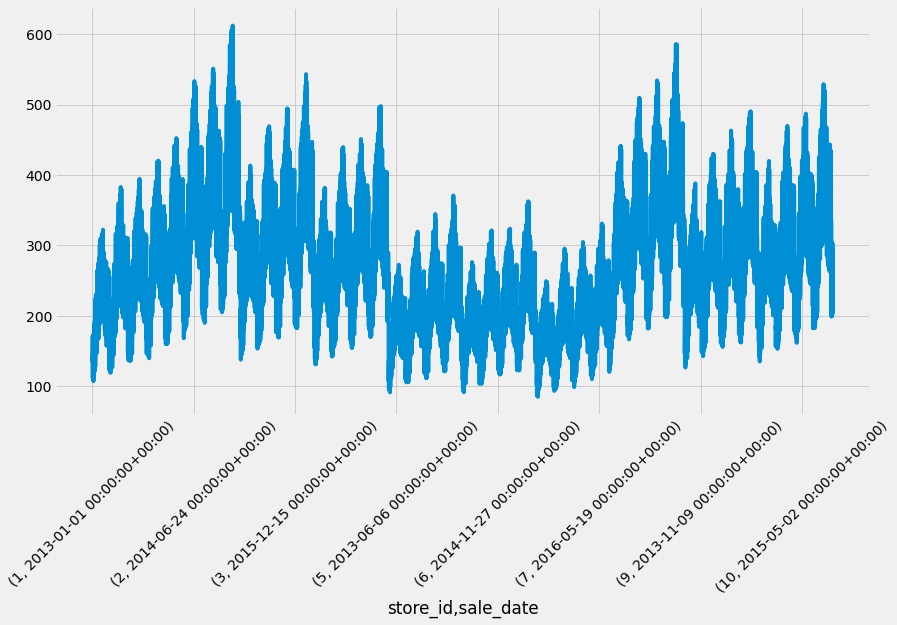

In [22]:

train.groupby(['store_id']).resample('D').sales_total.mean().plot()
plt.xticks(rotation=45);


In [23]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.434789,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-79.225757,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-79.904284,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-80.259357,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

<Figure size 1152x720 with 0 Axes>

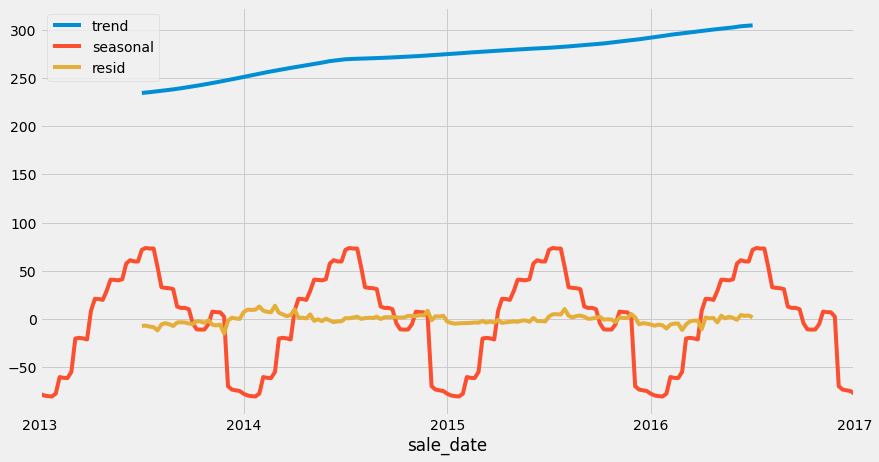

In [24]:
plt.figure(figsize = (16,10))
decomposition.iloc[:, 1:].plot()

## OPS data 

In [4]:
power =pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
power = dataprep.prep_opsd_data(power)

In [6]:

# split the data:
    
train = power[:'2013']

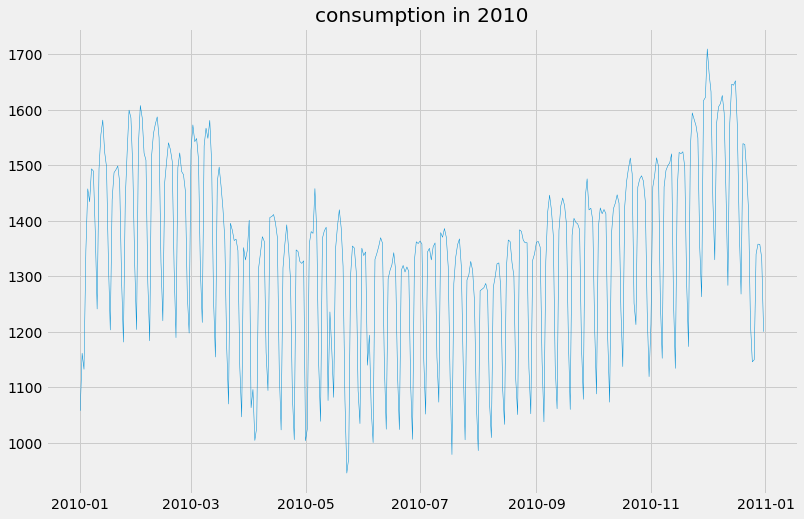

In [7]:
# lets look at consumption in a single year and see if we see any pattern
plt.figure(figsize=(12,8))
plt.plot(train.loc['2010-01':'2010-12']['consumption'], linewidth = 0.5)
plt.title("consumption in 2010")
plt.show()

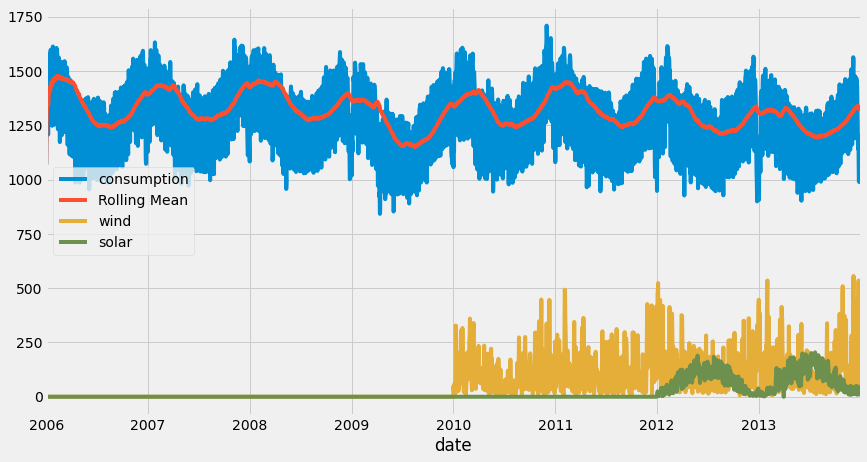

In [8]:
# plot the consumption, wind and solar data

train.consumption.plot(label="consumption")
plt.plot(train['consumption'].rolling('90D').mean(), label="Rolling Mean")
train.wind.plot()
train.solar.plot()
plt.legend()

(1100.0, 1400.0)

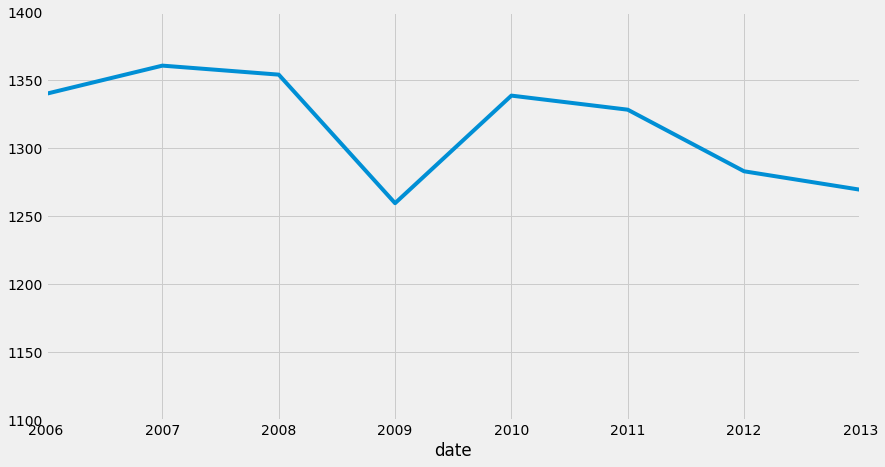

In [9]:
# resample data on yearly basis and plot
train.consumption.resample('Y').mean().plot()
plt.ylim(1100,1400)

(1100.0, 1400.0)

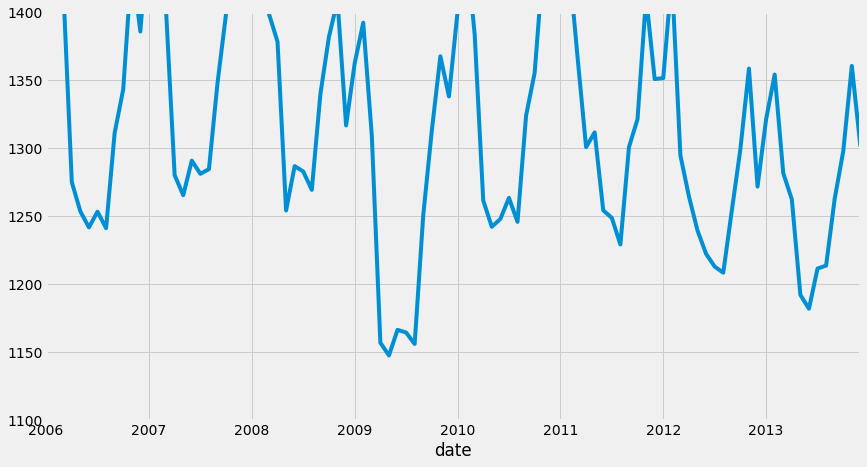

In [10]:
train.consumption.resample('M').mean().plot()
plt.ylim(1100,1400)

<AxesSubplot:xlabel='date'>

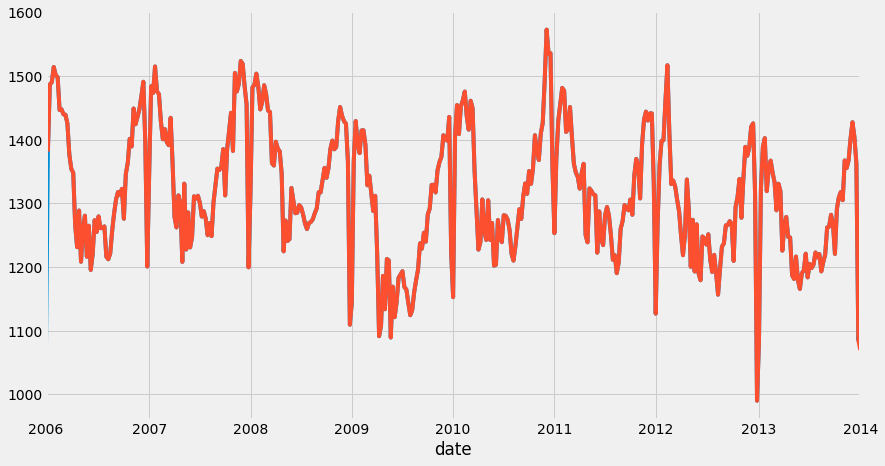

In [11]:
train.consumption.resample('W').mean().plot()
train.consumption.rolling(7).mean().plot()

<AxesSubplot:xlabel='month', ylabel='consumption'>

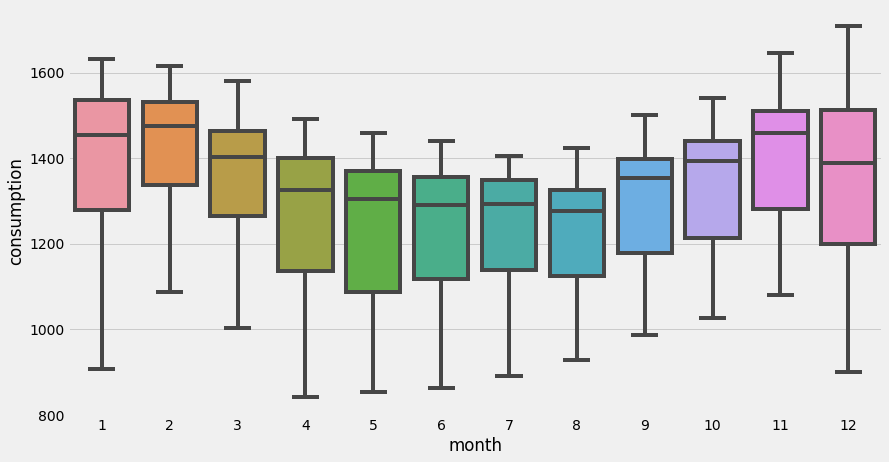

In [12]:
train['month'] = train.index.month
train['weekday'] = train.index.day_name()
# Energy consumption by month
sns.boxplot(data = train, x = 'month', y = 'consumption')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

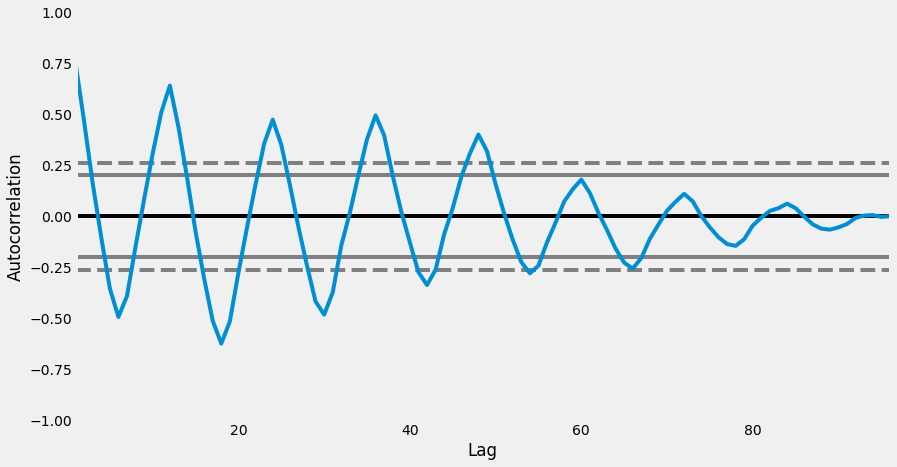

In [17]:

# autocorrelation plot 
pd.plotting.autocorrelation_plot(train.consumption.resample('M').mean())